In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
def doubleplot(pic1, pic2, c='gray', s=(10,8)):
    fig,ax = plt.subplots(1,2, facecolor='0.2',figsize=s)
    ax[0].imshow(pic1, cmap=c)
    ax[1].imshow(pic2,cmap=c)
    plt.show()

In [18]:
pic = Image.open('mypic2.jpg').convert('L')
npic = np.array(pic)

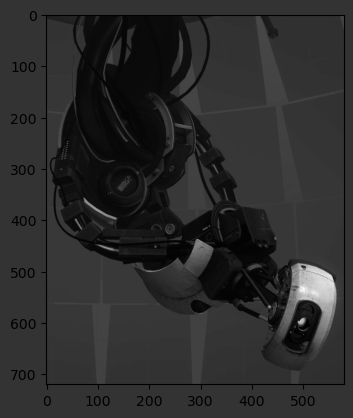

In [19]:
plt.figure(facecolor='0.2')
plt.imshow(pic, cmap='gray') #oh it's you

<Figure size 640x480 with 0 Axes>

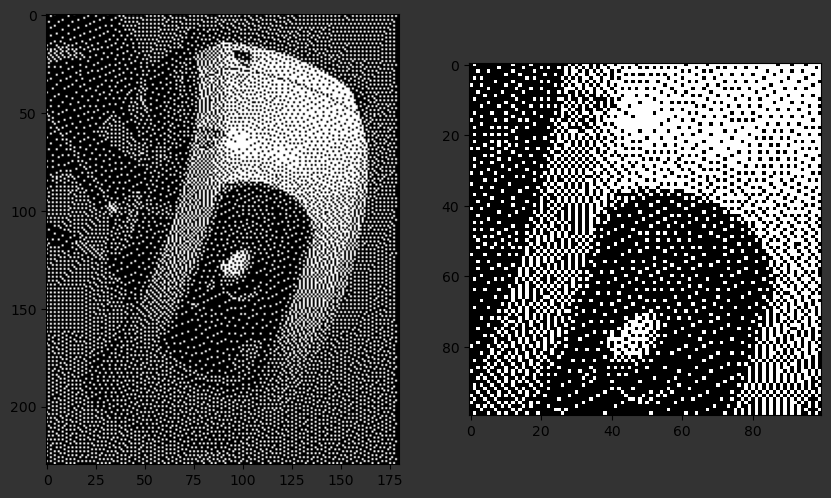

In [48]:
pic_ = Image.open('mypic2.jpg').convert('1')
pic_crop1 = pic_.crop((400,470,580,700))
pic_crop2 = pic_crop1.crop((50,50,150,150)) 
plt.figure(facecolor='0.2')
doubleplot(pic_crop1, pic_crop2)

In [20]:
from scipy.signal import convolve2d
from scipy.ndimage import median_filter
from scipy.ndimage import gaussian_filter
from scipy.ndimage import sobel

In [21]:
#gradient edge detection
filterX = np.zeros((3,3))
filterY = np.zeros((3,3))
filterX[1,0] = -0.5
filterX[1,2] = 0.5
filterY[0,1] = -0.5
filterY[2,1] = 0.5
dx1 = convolve2d(pic, filterX)
dy1 = convolve2d(pic, filterY)
grad_edge = np.sqrt(dx1*dx1+dy1*dy1)

In [22]:
#Roberts cross
mx = np.array([[1, 0], [0, -1]])
my = np.array([[0, 1], [-1, 0]])
Gx = convolve2d(pic, mx)
Gy = convolve2d(pic, my)
rob_cross = np.abs(Gx) + np.abs(Gy)

In [23]:
cr_grad_edge = grad_edge[470:720,400:580]
cr_rob_cross = rob_cross[470:720,400:580]

In [24]:
#sobel operator
pic01 = npic / 255.0
sobX = sobel(pic01, 1)
sobY = sobel(pic01, 0)
sobel_abs = np.abs(sobX) + np.abs(sobX)
sobel_pyth = np.hypot(sobX, sobY)

In [25]:
#gauss_filter first then sobel
G_pic = gaussian_filter(npic, 3)
pic0 = G_pic / 255.0
sobX = sobel(pic0, 1)
sobY = sobel(pic0, 0)
gauss_sobel = np.hypot(sobX, sobY)

In [26]:
#sobel first then median_filter
sobel_median = median_filter(sobel_pyth, size=3)

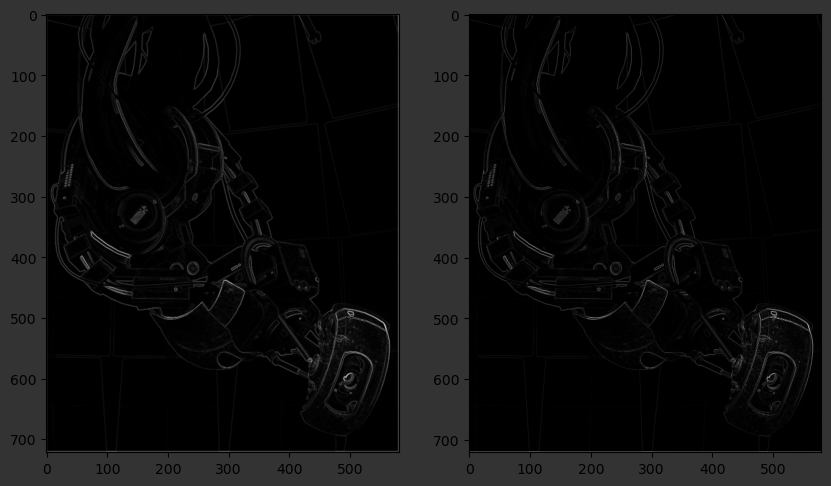

In [27]:
doubleplot(grad_edge, rob_cross)

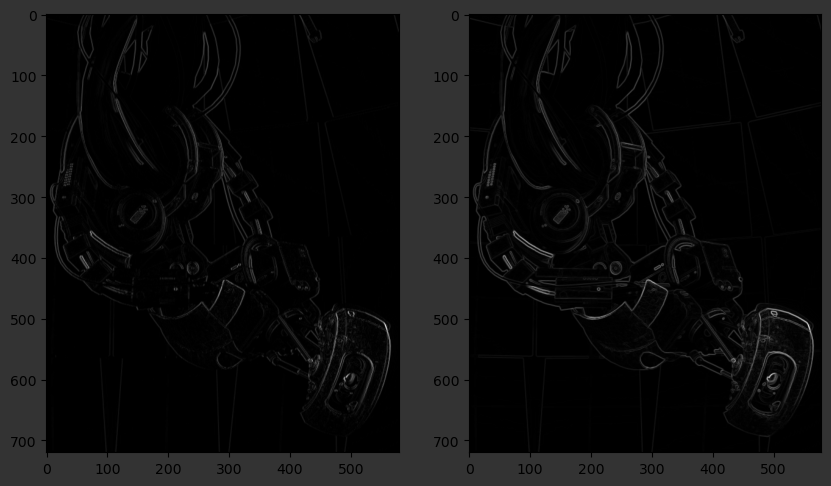

In [28]:
doubleplot(sobel_abs, sobel_pyth)

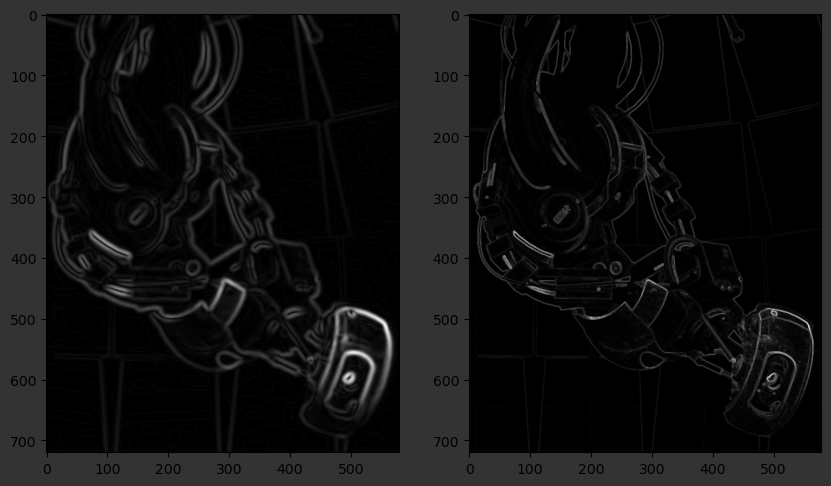

In [29]:
doubleplot(gauss_sobel, sobel_median)

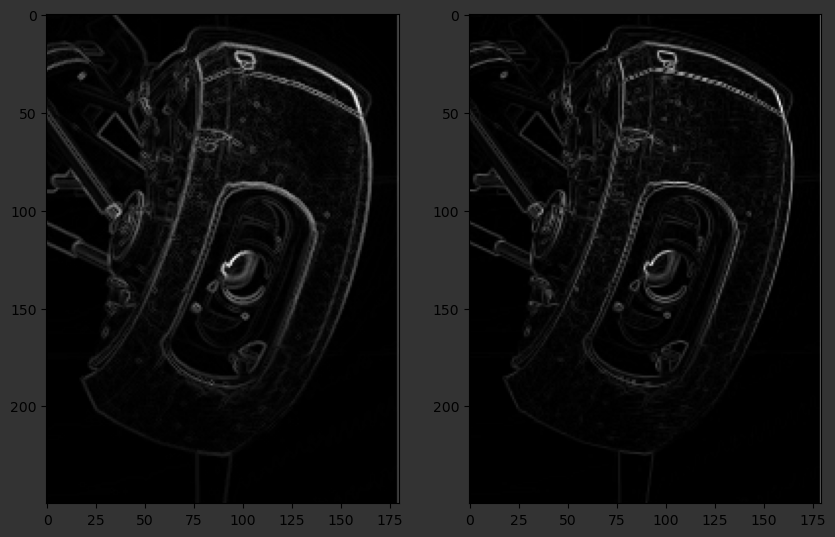

In [30]:
doubleplot(cr_grad_edge, cr_rob_cross)